In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
#import pyraf
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from astropy.wcs import wcs
from astropy.visualization import quantity_support

quantity_support()

from specutils import Spectrum1D
import warnings

from specutils.fitting import fit_generic_continuum
from specutils import SpectralRegion

from specutils.analysis import equivalent_width


%matplotlib inline

In [20]:
loc = '2024-1-SCI-037.20240501/product/'
name1= 'mbxgp'
name2= '2024050100'
sci='P'
obs='S'
aqq='12'
slit='13'
sci1='70'
sci2='71'
lamp='72'
ext='.fits'

data_aqq = fits.getdata(loc+name1+obs+name2+aqq+ext)
header_aqq = fits.getheader(loc+name1+obs+name2+aqq+ext)
data_slit = fits.getdata(loc+name1+obs+name2+slit+ext)
header_slit = fits.getheader(loc+name1+obs+name2+slit+ext)
data_sci1 = fits.getdata(loc+name1+sci+name2+sci1+ext)
header_sci1 = fits.getheader(loc+name1+sci+name2+sci1+ext)
data_sci2 = fits.getdata(loc+name1+sci+name2+sci2+ext)
header_sci2 = fits.getheader(loc+name1+sci+name2+sci2+ext)
data_lamp = fits.getdata(loc+name1+sci+name2+lamp+ext)
header_lamp = fits.getheader(loc+name1+sci+name2+lamp+ext)
print(data_sci1.shape)

(1026, 3172)


In [3]:
filename = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits'

# The spectrum is in the second HDU of this file.

with fits.open(filename) as f:
    specdata = f[1].data
    
    

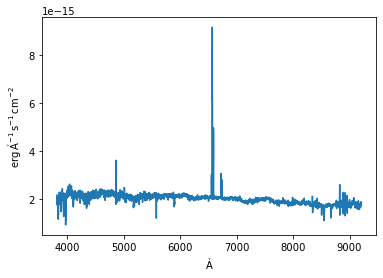

In [4]:
lamb = 10**specdata['loglam'] * u.AA
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1')
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
f, ax = plt.subplots()
ax.step(spec.spectral_axis, spec.flux)

In [6]:
with warnings.catch_warnings():  # Ignore warnings

    warnings.simplefilter('ignore')

    cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis)

<Quantity -14.73962656 Angstrom>

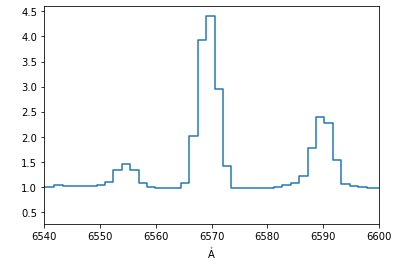

In [8]:
f, ax = plt.subplots()
ax.step(cont_norm_spec.wavelength, cont_norm_spec.flux)
ax.set_xlim(654 * u.nm, 660 * u.nm)

equivalent_width(cont_norm_spec, regions=SpectralRegion(6562 * u.AA, 6575 * u.AA))


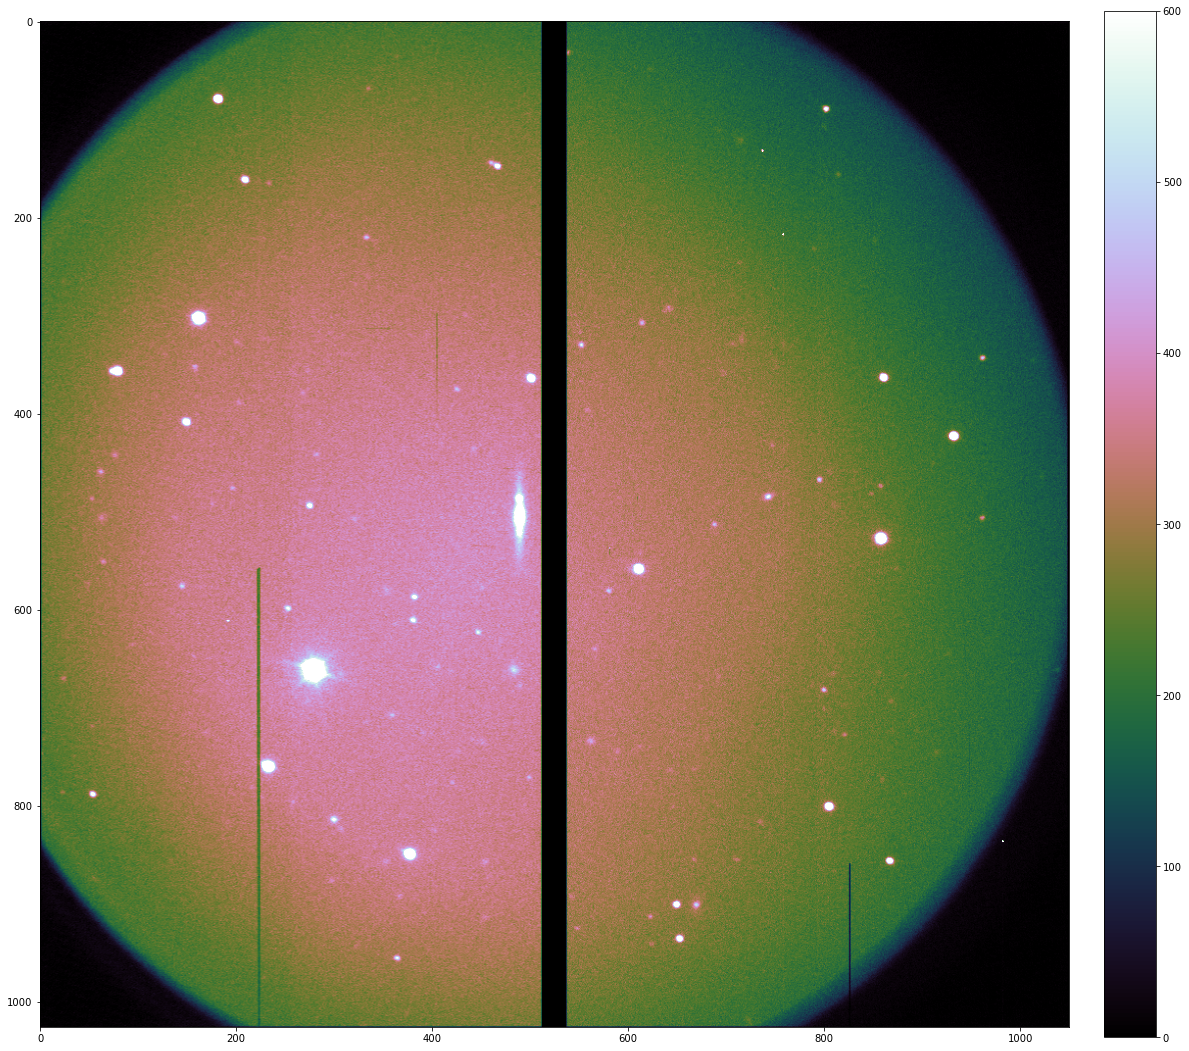

In [13]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
im = ax.imshow(data_aqq, cmap='cubehelix',vmin = 0, vmax = 600)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

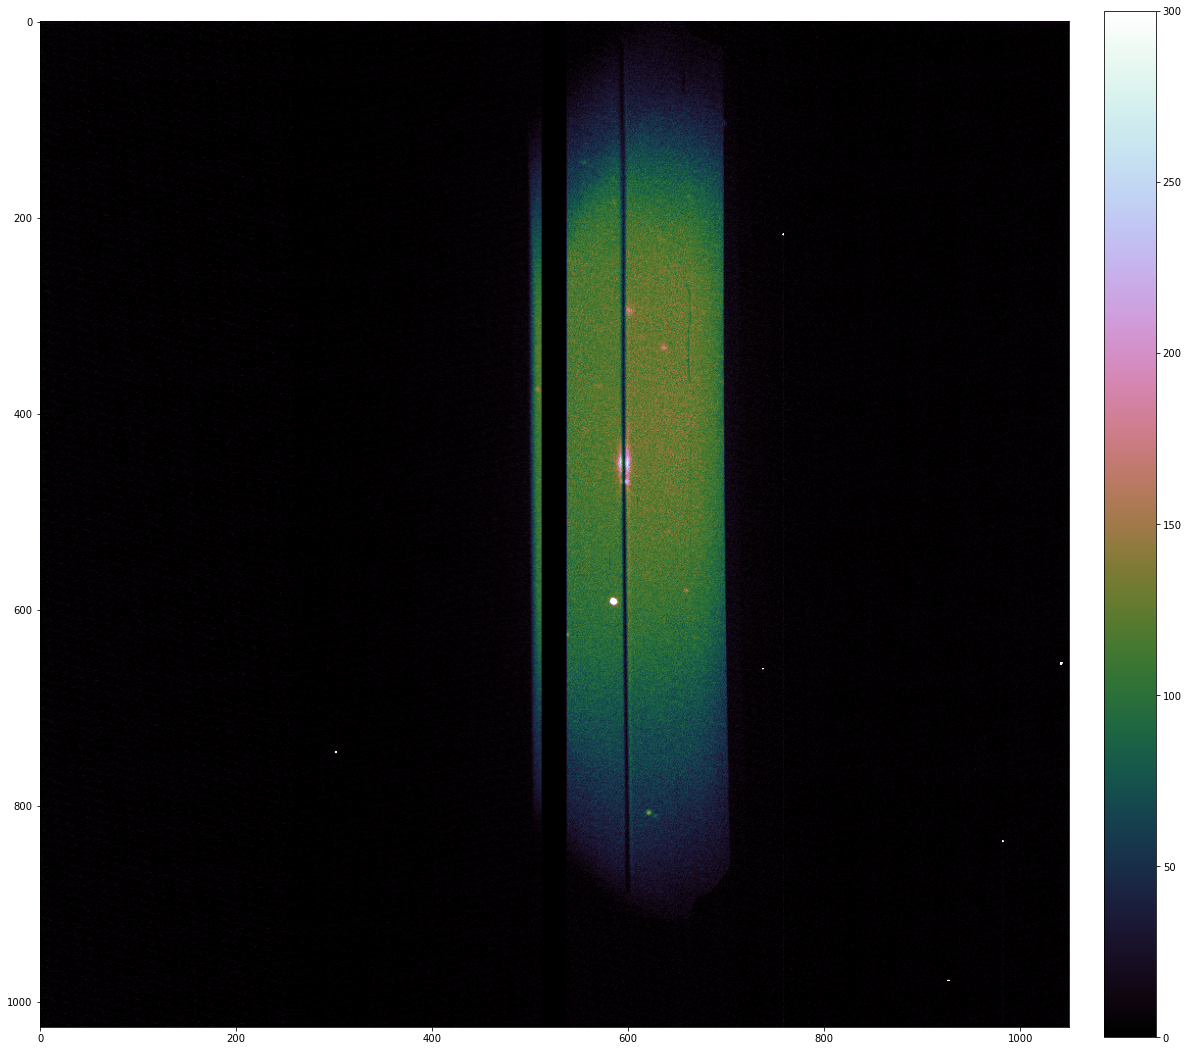

In [15]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
im = ax.imshow(data_slit, cmap='cubehelix',vmin = 0, vmax = 300)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

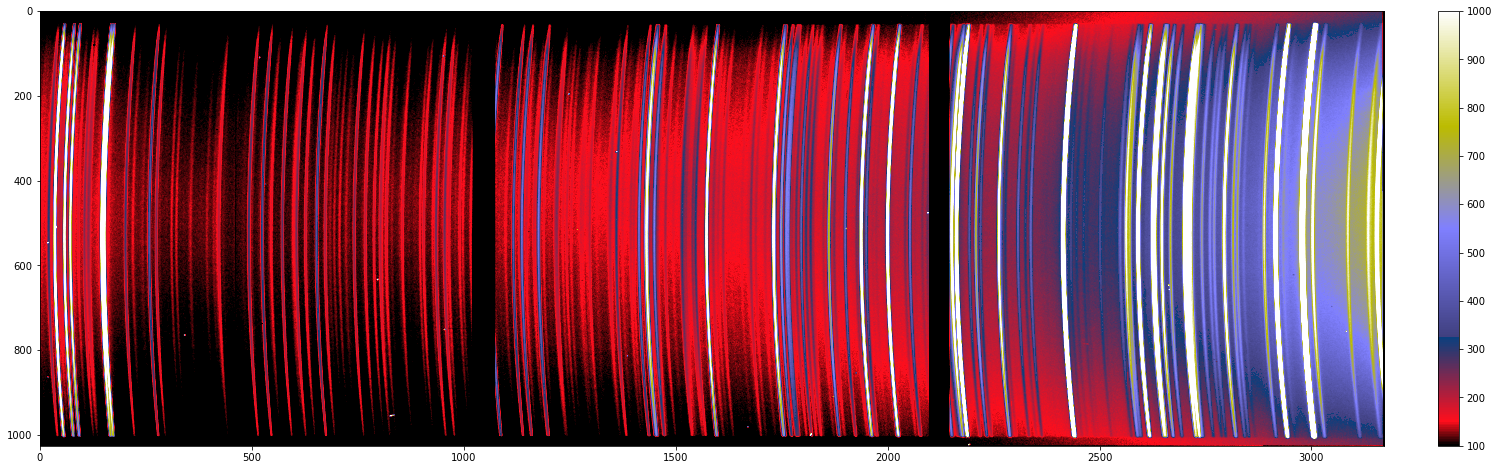

In [66]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_lamp, cmap='gist_stern',vmin = 100, vmax = 1000)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

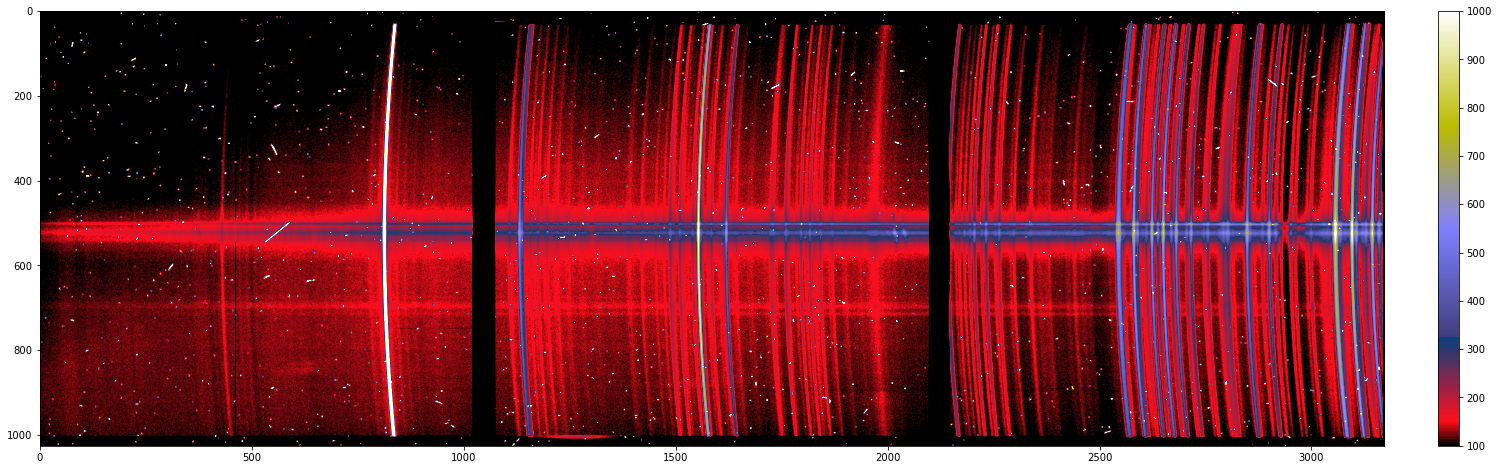

In [35]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_sci1, cmap='gist_stern',vmin = 100, vmax = 1000)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

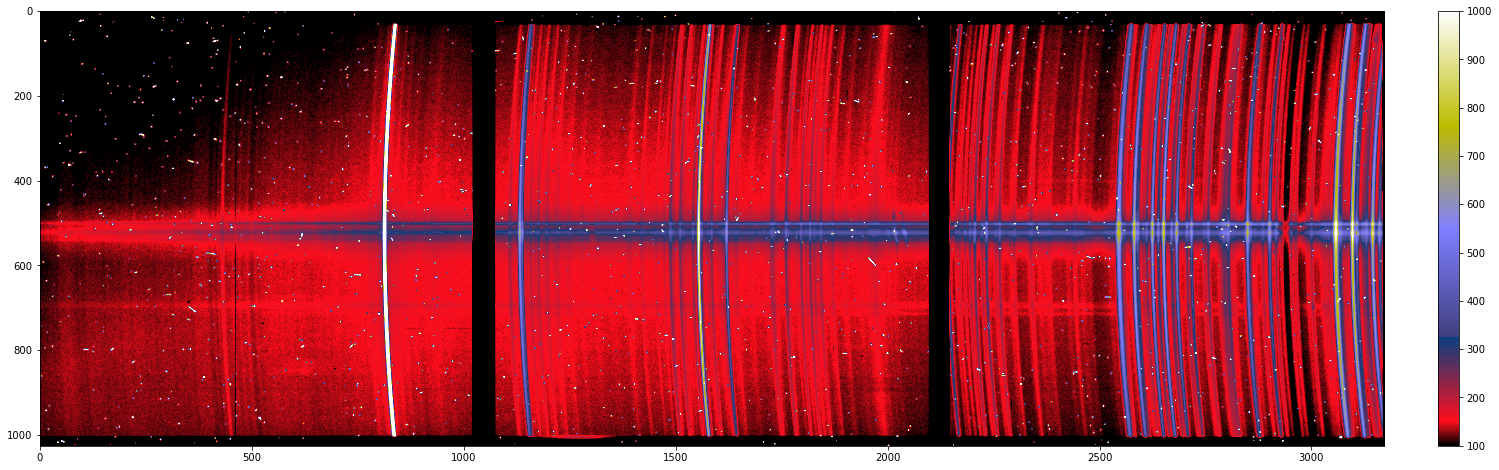

In [65]:
fig = plt.figure(figsize = (30,8))
ax = fig.add_subplot()
im = ax.imshow(data_sci2, cmap='gist_stern',vmin = 100, vmax = 1000)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

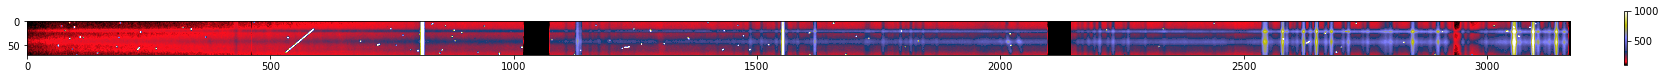

In [25]:
sci = data_sci1[480:550,0:3172]
sci_copy = np.copy(sci)

fig = plt.figure(figsize = (30,1))
ax = fig.add_subplot()
im = ax.imshow(sci_copy, cmap='gist_stern',vmin = 100, vmax = 1000)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
